In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Introdução

Neste capítulo, apresentaremos os autovalores e autovetores que desempenham um papel muito importante em muitas aplicações em ciência e engenharia. O prefixo eigen- é adotado da palavra alemã eigen para "próprio", característico" e pode soar realmente abstrato e assustador no começo. Mas quando você começar a entendê-los, descobrirá que eles trazem muitos insights e conveniências para nossos problemas.

Eles têm muitas aplicações, para citar algumas, encontrar as frequências naturais e formas de modo em sistemas dinâmicos, resolver equações diferenciais (veremos em capítulos posteriores), reduzir as dimensões usando análise de componentes principais, obter as tensões principais na mecânica e em breve. Até mesmo o famoso algoritmo do mecanismo de busca do Google - PageRank, usa os autovalores e autovetores para atribuir pontuações às páginas e classificá-las na pesquisa.

Este capítulo ensina como usar algumas maneiras comuns de encontrar os autovalores e autovetores. No final deste capítulo, você deve entender o método power, o método QR e como usar o Python para encontrá-los.

Esse capitulo é baseado no excelente livro [Python Programming and Numerical Methods](https://pythonnumericalmethods.berkeley.edu/index.html).

## Discussão Matemática

Já vimos que aplicar a matriz $A$ ao vetor coluna $x$, que é $Ax$, é uma transformação linear de $x$. Existe uma transformação especial na forma a seguir:

$$
Ax = \lambda x
$$

Onde $A$ é uma matriz $n \times n$, $x$ é um vetor coluna $n \times 1 (x \neq 0)$, e $\lambda$ é algum escalar. Qualquer $\lambda$ que satisfaça a equação acima é conhecido como um **autovalor** da matriz $A$, enquanto o vetor associado $x$ é chamado de **autovetor** correspondente a $\lambda$.

A motivação por trás dos autovalores e autovetores é que nos ajuda a entender as características da transformação linear, facilitando assim as coisas. Sabemos que um vetor $x$ pode ser transformado em um vetor diferente multiplicando $A$, ou seja $Ax$. O efeito da transformação representa uma escala do comprimento do vetor e/ou a rotação do vetor. A equação acima aponta que para alguns vetores, o efeito de transformação de $Ax$ é apenas de escala (alongamento, compressão e inversão). Os autovetores são os vetores que possuem essa propriedade e os autovalores $\lambda$s são os fatores de escala. Vejamos o exemplo a seguir.


#### Exemplo:
Plota o vetor $x=[[1], [1]]$ e o vetor $b=Ax$ onde $A=[[2,0], [0,1]]$

In [3]:
plt.style.use('seaborn-poster')

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

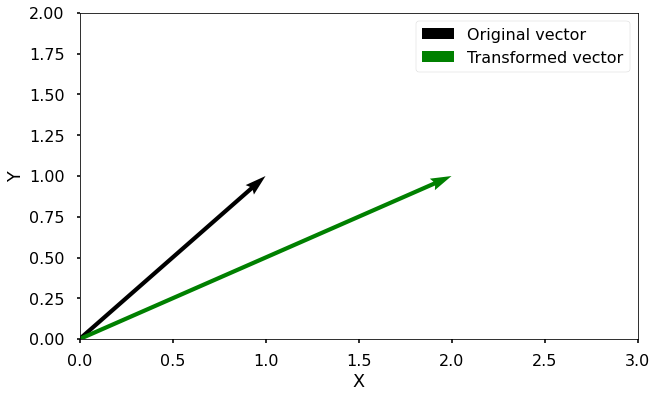

In [4]:
A = np.array([[2, 0],[0, 1]])

x = np.array([[1],[1]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(0,2))

Podemos ver pela figura gerada que o vetor original $x$ é girado e esticado por mais tempo depois de transformado por $A$. O vetor $[[1], [1]]$ é transformado em $[[2], [1]]$. Vamos tentar fazer o mesmo exercício com um vetor diferente $[[1], [0]]$.

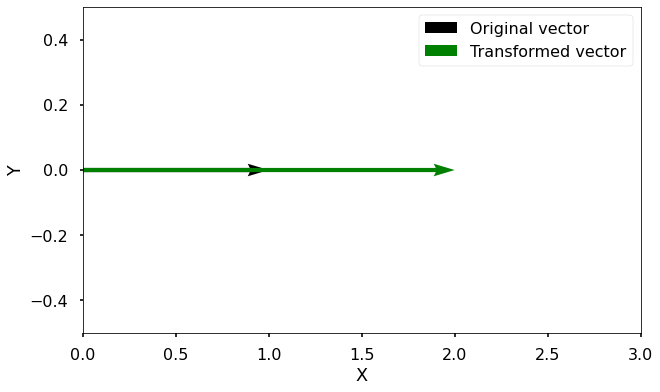

In [5]:
x = np.array([[1], [0]])
b = np.dot(A, x)

plot_vect(x,b,(0,3),(-0.5,0.5))

Agora podemos ver que com este novo vetor, a única coisa que mudou após a transformação é o comprimento do vetor, ele é esticado. O novo vetor é $[[2], [0]]$, portanto, a transformada é

$$
Ax=2x
$$

com $x = [[1], [0]]$ e $\lambda=2$. A direção do vetor não muda (sem rotação). Você também pode tentar que $[[0], [1]]$ é outro autovetor, tente verificar por si mesmo.

### A Equação Característica

Para obter os autovalores e autovetores, de $Ax = \lambda x$, podemos obter a seguinte forma:

$$
(A − \lambda I) x=0
$$

Onde $I$ é a matriz de identificação com as mesmas dimensões de $A$. Se a matriz $A − \lambda I$ tem uma inversa, então multiplique ambos os lados por $(A − \lambda I)^{−1}$, obtemos uma solução trivial $x=0$. Portanto, quando $A − \lambda I$ é singular (não existe inversa), temos uma solução não trivial, o que significa que o determinante é zero:

$$
\text{det}(A − \lambda I) = 0
$$

esta equação é chamada de equação característica, que levará a uma equação polinomial para $\lambda$, então podemos resolver para os autovalores. Vejamos um exemplo.

#### Exemplo:
Obtenha os autovalores para a matriz $[[0, 2], [2, 3]]$

**Resposta:**

A equação característica nos dá

$$
\begin{vmatrix}
0-\lambda & 2 \\ 
2 & 3-\lambda
\end{vmatrix}
=0
$$

Então, temos

$$-\lambda(3-\lambda)-4 = 0 \Rightarrow \lambda^2-3\lambda-4=0$$

Dessa forma obtemos dois autovalores

$$\lambda_1 = 4,\quad \lambda_2 = -1$$

#### Exemplo:
Calcule os autovetores associados com os autovalores acima

**Resposta:**


Vamos obter o primeiro autovetor quando $\lambda_1 = 4$, podemos simplesmente inseri-lo de volta em $A − \lambda I = 0$, onde temos:

$$
\begin{bmatrix}
-4 & 2 \\
2 & -1 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\
\end{bmatrix}
=\begin{bmatrix}
0\\0\\
\end{bmatrix}
$$

Portanto, temos duas equações $−4x_1+2x_2=0$ e $2x_1−x_2=0$, ambas indicam que $x_2=2x_1$. Portanto, podemos ter o primeiro autovetor como

$$x_1 = k_1\begin{bmatrix}
1\\2\\
\end{bmatrix}$$

$k_1$ é um vetor escalar $(k_1 \neq 0)$, desde que tenhamos a razão entre $x_2$ e $x_1$ como $2$, será um autovetor. Podemos verificar que o vetor $[[1], [2]]$ é um autovetor inserindo-o de volta:

$$
\begin{bmatrix}
0 & 2 \\
2 & 3 \\
\end{bmatrix}
\begin{bmatrix}
1\\2\\
\end{bmatrix}
=\begin{bmatrix}
4\\8\\
\end{bmatrix}
=4\begin{bmatrix}
1\\2\\
\end{bmatrix}
$$

Ao inserir $\lambda_2=−1$ da mesma forma que acima, podemos obter o outro autovetor como o seguinte, onde $k_2 \neq 0$: 

$$x_2 = k_2\begin{bmatrix}
-2\\1\\
\end{bmatrix}$$

A partir do exemplo acima, podemos ver como podemos obter os autovalores e autovetores de uma matriz $A$, e o escolhido dos autovetores para um sistema não é único. Mas as coisas se tornarão realmente complicadas quando você tiver uma matriz $A$ maior ao tentar resolver a equação característica do polinômio de enésima ordem. Felizmente, existem muitos métodos numéricos diferentes que foram desenvolvidos para resolver os problemas de autovalor para matrizes maiores. Apresentaremos o **método de potência** e o **método QR** nas próximas duas seções.

## O Método de Potência

### Encontrar o maior autovalor

Em alguns problemas, precisamos apenas encontrar o maior autovalor dominante e seu autovetor correspondente. Neste caso, podemos usar o método da potência - um método iterativo que irá convergir para o maior autovalor. Vamos ver a seguir como funciona o método de energia.

Considere uma matriz $A_{n \times n}$ que tem $n$ autovalores reais linearmente independentes $\lambda_1, \lambda_2, \dots, \lambda_n$ e os autovetores correspondentes $v_1, v_2, \dots, v_n$. Como os autovalores são escalares, podemos classificá-los de modo que $|\lambda_1| > |\lambda_2| > \dots > |\lambda_n|$ (na verdade, exigimos apenas $|\lambda_1| > |\lambda_2|$, outros autovalores podem ser iguais entre si).

Como os autovetores são independentes, eles são um conjunto de vetores de base, o que significa que qualquer vetor que esteja no mesmo espaço pode ser escrito como uma combinação linear dos vetores de base. Ou seja, para qualquer vetor $x_0$, ele pode ser escrito como:

$$ x_0 = c_1v_1+c_2v_2+\dots+c_n v_n$$

onde $c_1 \neq 0$ é a restrição. Se for zero, precisamos escolher outro vetor inicial para que $c_1 \neq 0$.

Agora vamos multiplicar ambos os lados por $A$

$$ Ax_0 = c_1Av_1+c_2Av_2+\dots+c_nAv_n$$

Como $Av_i = \lambda{v_i}$, teremos:

$$ Ax_0 = c_1\lambda_1v_1+c_2\lambda_2v_2+\dots+c_n\lambda_nv_n$$

Nós podemos mudar a equação acima para

$$ Ax_0 = c_1\lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n}{\lambda_1}v_n]= c_1\lambda_1x_1$$ 

onde $x_1$ é um novo vetor e 

$$x_1 = v_1+\frac{c_2}{c_1}\frac{\lambda_2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n}{\lambda_1}v_n.$$

Isso termina a primeira iteração. E podemos multiplicar $A$ por $x_1$ para iniciar a 2ª iteração:

$$ Ax_1 = \lambda_1{v_1}+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1}v_n $$ 

Da mesma forma, podemos reorganizar a equação acima para:

$$ Ax_1 = \lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1^2}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1^2}v_n] = \lambda_1x_2$$ 

onde $x_2$ é outro vetor novo e 

$$x_2 = v_1+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1^2}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1^2}v_n.$$

Podemos continuar a multiplicar $A$ com o novo vetor que obtemos de cada iteração $k$ vezes:

$$ Ax_{k-1} = \lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n] = \lambda_1x_k$$ 

Como $λ_1$ é o maior autovalor, portanto, a razão $\frac{\lambda_i}{\lambda_1}<1$ para todo $i>1$. Assim, quando aumentamos $k$ para um valor suficientemente grande, a razão de $(\frac{\lambda_n}{\lambda_1})^{k}$ será próxima de $0$. Assim, todos os termos que contêm essa razão podem ser desprezados à medida que $k$ cresce:

$$ Ax_{k-1} = {\lambda_1}v_1 $$

Essencialmente, como $k$ é grande o suficiente, obteremos o maior autovalor e seu autovetor correspondente. Ao implementar este método de potência, normalmente normalizamos o vetor resultante em cada iteração. Isso pode ser feito fatorando o maior elemento do vetor, o que tornará o maior elemento do vetor igual a 1. Essa normalização nos dará o maior autovalor e seu autovetor correspondente ao mesmo tempo. Vejamos o exemplo a seguir.

Você pode dizer quando devemos parar a iteração? O critério básico de parada deve ser um dos três: nas iterações consecutivas, (1) a diferença entre autovalores é menor que alguma tolerância especificada; (2) o ângulo entre autovetores é menor que um limiar; ou a norma do vetor residual é pequena o suficiente.

#### Exemplo: 
Sabemos da última seção que o maior autovalor é $4$ para a matriz $A = \begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}$, agora use o método da potência para encontrar o maior autovalor e o autovetor associado. Você pode usar o vetor inicial $[1, 1]$ para iniciar a iteração.


Primeira iteração: 
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
1\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\5\\
\end{bmatrix}
=5\begin{bmatrix}
0.4\\1\\
\end{bmatrix}
$$

Segunda iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.4\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\3.8\\
\end{bmatrix}
=3.8\begin{bmatrix}
0.5263\\1\\
\end{bmatrix}
$$

terceira iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.5263\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 4.0526\\
\end{bmatrix}
= 4.0526\begin{bmatrix}
0.4935\\1\\
\end{bmatrix}
$$

quarta iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.4935\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 3.987\\
\end{bmatrix}
= 3.987\begin{bmatrix}
0.5016\\1\\
\end{bmatrix}
$$

quinta iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.5016\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 4.0032\\
\end{bmatrix}
= 4.0032\begin{bmatrix}
0.4996\\1\\
\end{bmatrix}
$$

sexta iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.4996\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 3.9992\\
\end{bmatrix}
= 3.9992\begin{bmatrix}
0.5001\\1\\
\end{bmatrix}
$$

setima iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.5001\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 4.0002\\
\end{bmatrix}
= 4.0002\begin{bmatrix}
0.5000\\1\\
\end{bmatrix}
$$

Podemos ver após 7 iterações, o autovalor convergiu para 4 com $[0.5, 1]$ como o autovetor correspondente.

#### Exercicio:

Implementa o método de potência no Python

**Resposta:**

In [4]:
def normalize(x):
    fac = x.max()
    #fac = abs(x).max()
    x_n = x / fac
    return fac, x_n

In [79]:
def power_method(A, x0, tol=1e-5, max_iter=100):
    iteration = 0
    error = 1000
    lambda_1, x0 = normalize(x0)

    while error > tol and iteration<max_iter:
        lambda_old = lambda_1
        x0 = np.dot(A, x0)
        lambda_1, x0 = normalize(x0)
        iteration += 1

        error = abs(lambda_1 - lambda_old)


    return lambda_1, x0


In [80]:
x0 = np.array([1, 1])
A = np.array([[0, 2], 
              [2, 3]])

power_method(A, x0)

(4.000000794728724, array([0.4999999, 1.       ]))

### O método da potência inversa

Os autovalores da matriz inversa $A^{−1}$ são os recíprocos dos autovalores de $A$. Podemos aproveitar esse recurso assim como o método da potência para obter o menor autovalor de $A$, este será a base do método da potência inversa. Os passos são muito simples, em vez de multiplicar $A$ como descrito acima, apenas multiplicamos $A^{−1}$ para nossa iteração encontrar o maior valor de $\frac{1}{\lambda_1}$, que será o menor valor dos autovalores para $A$. Quanto à inversa da matriz , na prática, podemos usar os métodos que abordamos no capítulo anterior para calculá-lo. Não vamos entrar em detalhes aqui, mas vamos ver um exemplo.

#### Exemplo:
Encontre o menor autovalor e autovetor para $A = \begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}$. 

**Resposta:**

In [7]:
# Não tenho certeza do resultado dessa função!!!
def power_method(A, x0, tol=1e-5, max_iter=100, inverse=False):
    iteration = 0
    error = 1000
    lambda_1, x0 = normalize(x0)

    if inverse:
        A = np.linalg.inv(A).copy()
        print("Inverse Power Method")

    while error > tol and iteration < max_iter:
        x0_old = x0
        x0 = np.dot(A, x0)
        lambda_1, x0 = normalize(x0)
        iteration += 1
        error = np.linalg.norm(x0 - x0_old)

    if inverse:
        return 1/lambda_1, x0
    if not inverse:
        return lambda_1, x0


In [8]:
x0 = np.array([1, 1])
A = np.array([[0, 2], 
              [2, 3]])
              
power_method(A, x0, max_iter=15, inverse=True)

Inverse Power Method


(2.0, array([-1.99999999,  1.        ]))

In [9]:
A.dot(np.array([-1.99999999,  1.        ]))

array([ 2.        , -0.99999998])

In [10]:
from scipy.linalg import eigh

eigh(A)

(array([-1.,  4.]),
 array([[-0.89442719,  0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))

### O método de potência deslocado
Em alguns casos, precisamos encontrar todos os autovalores e autovetores em vez do maior e menor. Uma maneira simples, mas ineficiente, é usar o método de potência deslocada (apresentaremos uma maneira eficiente na próxima seção). Dado $Ax = \lambda{x}$, e $\lambda_1$ é o maior autovalor obtido pelo método da potência, então podemos ter:

$$[A - \lambda_1I]x = \alpha{x}$$

onde $\alpha$'s são os autovalores da matriz deslocada $A - \lambda_1I$, que será $0, \lambda_2-\lambda_1, \lambda_3-\lambda_1, \dots, \lambda_n-\lambda_1$.

Agora, se aplicarmos o método da potência à matriz deslocada, podemos determinar o maior autovalor da matriz deslocada, ou seja, $\alpha_k$. Como $\alpha_k = \lambda_k - \lambda_1$, podemos obter o autovalor $\lambda_k$ facilmente. Podemos repetir esse processo muitas vezes para encontrar todos os outros autovalores. Mas você pode ver que, envolve muito trabalho! Um método melhor para encontrar todos os autovalores é usar o método QR, vamos ver na próxima seção como funciona!

## O Método QR

O método QR é um método iterativo preferido para encontrar todos os autovalores de uma matriz (mas não os autovetores ao mesmo tempo). A ideia é baseada nos seguintes dois conceitos

matrizes semelhantes terão os mesmos autovalores e autovetores associados. Duas matrizes quadradas $A$ e $B$ são semelhantes se:

$$A = C^{-1}BC$$

onde $C$ é uma matriz invertível.

O método QR é uma forma de decompor uma matriz em duas matrizes $Q$ e $R$, onde $Q$ é uma matriz ortogonal e $R$ é uma matriz triangular superior. Uma matriz ortogonal tem as características: $Q^{-1} = Q^T$, que significa $Q^{-1}Q=Q^TQ=I$.

Como conectamos esses dois conceitos para encontrar os autovalores? Digamos que temos uma matriz $A_0$ cujos autovalores devem ser determinados. No $k$-ésimo passo (começando com $k=0$), podemos realizar a decomposição QR e obter $A_k = Q_kR_k$, onde $Q_k$ é uma matriz ortogonal e $R_k$ é uma matriz triangular superior. Formamos então $A_{k+1} = R_kQ_k$, que notamos que

$$A_{k+1} = R_kQ_k = Q^{-1}_kQ_kR_kQ_k = Q^{-1}_kA_kQ_k$$

portanto, todos os $A_k$ são semelhantes, como discutimos acima, todos eles têm os mesmos autovalores.

À medida que a iteração avança, eventualmente convergiremos para uma forma de matriz triangular superior:

$$ A_k = R_kQ_k = \begin{bmatrix}
\lambda_1 & X & \dots & X\\
0 & \lambda_2 & \dots & X\\
& &\dots &\\
0 & 0 & \dots & \lambda_n\\
\end{bmatrix}$$

onde os valores diagonais são os autovalores da matriz. Em cada iteração do método QR, a fatoração de uma matriz em uma matriz ortogonal e uma matriz triangular superior pode ser feita usando uma matriz especial chamada matriz de Householder. Não entraremos nos detalhes matemáticos de como você obtém $Q$ e $R$ da matriz, em vez disso, usaremos a função Python para obter as duas matrizes diretamente.

#### Exemplo: 
Use a função `qr` em `numpy.linalg` para decompor a matriz $A = \begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}$. E verifique os resultados. Depois se o método QR para obter os autovalores da matriz $A$. Faça 20 iterações e imprima a 1ª, 5ª, 10ª e 20ª iteração.

In [111]:
a = np.array([[0, 2], 
              [2, 3]])

q, r = np.linalg.qr(a)

print('Q:', q)
print('R:', r)

b = np.dot(q, r)
print('QR:', b)

Q: [[ 0. -1.]
 [-1.  0.]]
R: [[-2. -3.]
 [ 0. -2.]]
QR: [[0. 2.]
 [2. 3.]]


In [113]:
a = np.array([[0, 2], 
              [2, 3]])
p = [1, 5, 10, 20]
for i in range(20):
    q, r = np.linalg.qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

Iteration 1:
[[3. 2.]
 [2. 0.]]
Iteration 5:
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]
Iteration 10:
[[ 4.00000000e+00  9.53674316e-06]
 [ 9.53674316e-06 -1.00000000e+00]]
Iteration 20:
[[ 4.00000000e+00  9.09484250e-12]
 [ 9.09494702e-12 -1.00000000e+00]]


Podemos ver que após a 5ª iteração, os autovalores convergem para os corretos.